# ✈️ Keşifsel Veri Analizi (EDA)
## Airline Passenger Satisfaction Dataset

Bu notebook, uçak yolcularının memnuniyet verisi üzerinde kapsamlı bir keşifsel veri analizi gerçekleştirir.

**İçindekiler:**
1. Veri Yükleme ve İlk İnceleme
2. Eksik Değer Analizi
3. Hedef Değişken Dağılımı
4. Sayısal Değişken Analizi
5. Kategorik Değişken Analizi
6. Korelasyon Analizi
7. Hizmet Değerlendirmeleri ve Memnuniyet İlişkisi
8. Sonuç ve Öneriler

## 📚 Kütüphanelerin Yüklenmesi

Analiz için gerekli Python kütüphanelerini yüklüyoruz.

In [1]:
# Temel kütüphaneler
import numpy as np
import pandas as pd

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

# Uyarıları kapatıyoruz (daha temiz çıktı için)
import warnings
warnings.filterwarnings('ignore')

# Grafik ayarları
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Pandas görüntüleme ayarları
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✓ Tüm kütüphaneler başarıyla yüklendi!")

✓ Tüm kütüphaneler başarıyla yüklendi!


## 1️⃣ Veri Yükleme ve İlk İnceleme

Kaggle'dan indirilen eğitim veri setini yükleyip temel özelliklerini inceliyoruz.

In [2]:
# Veri setini yüklüyoruz
# Not: Veri seti 'data/raw/train.csv' konumunda olmalıdır
df = pd.read_csv('../data/raw/train.csv')

print("="*60)
print("VERİ SETİ BAŞARIYLA YÜKLENDİ")
print("="*60)
print(f"\n📊 Veri Seti Boyutu:")
print(f"   - Satır sayısı (örnek): {df.shape[0]:,}")
print(f"   - Sütun sayısı (özellik): {df.shape[1]}")
print(f"   - Bellek kullanımı: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

VERİ SETİ BAŞARIYLA YÜKLENDİ

📊 Veri Seti Boyutu:
   - Satır sayısı (örnek): 103,904
   - Sütun sayısı (özellik): 25
   - Bellek kullanımı: 45.80 MB


In [3]:
# İlk 5 satırı inceliyoruz
print("📋 Veri Setinin İlk 5 Satırı:")
df.head()

📋 Veri Setinin İlk 5 Satırı:


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# Veri tipleri ve genel bilgi
print("📊 Sütun Bilgileri:")
print("-"*60)
df.info()

📊 Sütun Bilgileri:
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking  

In [5]:
# Sayısal sütunların istatistiksel özeti
print("📈 Sayısal Değişkenlerin İstatistiksel Özeti:")
df.describe().round(2)

📈 Sayısal Değişkenlerin İstatistiksel Özeti:


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103594.00
mean,51951.50,64924.21,39.38,1189.45,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.30,3.64,3.29,14.82,15.18
std,29994.65,37463.81,15.11,997.15,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.23,38.70
min,0.00,1.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,25975.75,32533.75,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,51951.50,64856.50,40.00,843.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,77927.25,97368.25,51.00,1743.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,103903.00,129880.00,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


## 2️⃣ Eksik Değer Analizi

Veri setindeki eksik değerleri (NaN) tespit edip görselleştiriyoruz. Eksik değerler modelleme öncesi mutlaka ele alınmalıdır.

In [6]:
# Eksik değer sayısı ve yüzdesi
missing_data = pd.DataFrame({
    'Eksik Sayısı': df.isnull().sum(),
    'Eksik Yüzdesi (%)': (df.isnull().sum() / len(df) * 100).round(2)
})

# Sadece eksik değer olan sütunları gösteriyoruz
missing_data = missing_data[missing_data['Eksik Sayısı'] > 0]

if len(missing_data) > 0:
    print("⚠️ EKSİK DEĞER TESPİT EDİLDİ:")
    print("-"*40)
    print(missing_data.sort_values('Eksik Sayısı', ascending=False))
else:
    print("✓ Veri setinde eksik değer bulunmamaktadır!")

⚠️ EKSİK DEĞER TESPİT EDİLDİ:
----------------------------------------
                          Eksik Sayısı  Eksik Yüzdesi (%)
Arrival Delay in Minutes           310                0.3


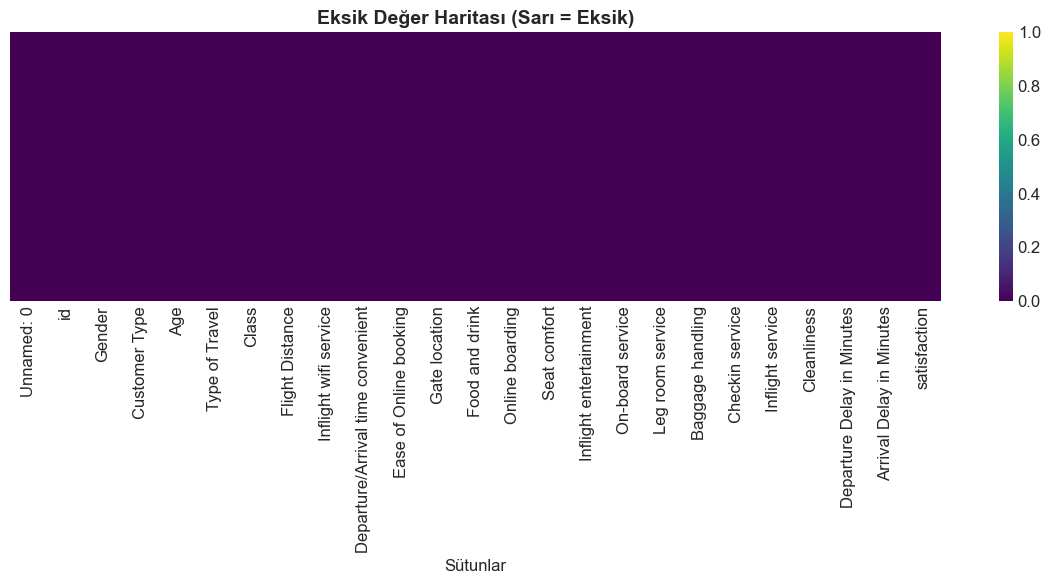

In [7]:
# Eksik değer görselleştirmesi
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Eksik Değer Haritası (Sarı = Eksik)', fontsize=14, fontweight='bold')
    plt.xlabel('Sütunlar')
    plt.tight_layout()
    plt.show()
else:
    print("Eksik değer olmadığı için görselleştirme yapılmadı.")

## 3️⃣ Hedef Değişken Dağılımı

Tahmin etmeye çalıştığımız hedef değişken `satisfaction`'ın dağılımını inceliyoruz. Sınıf dengesizliği varsa modelleme stratejimizi buna göre belirlememiz gerekir.

In [8]:
# Hedef değişken dağılımı
target_counts = df['satisfaction'].value_counts()
target_percentages = df['satisfaction'].value_counts(normalize=True) * 100

print("🎯 HEDEF DEĞİŞKEN DAĞILIMI (satisfaction):")
print("-"*40)
for label, count in target_counts.items():
    percentage = target_percentages[label]
    print(f"   {label}: {count:,} ({percentage:.1f}%)")

# Denge oranı
balance_ratio = target_counts.min() / target_counts.max()
print(f"\n   Sınıf Denge Oranı: {balance_ratio:.2f}")
if balance_ratio > 0.8:
    print("   ✓ Sınıflar nispeten dengeli")
else:
    print("   ⚠️ Sınıf dengesizliği mevcut, dikkat edilmeli")

🎯 HEDEF DEĞİŞKEN DAĞILIMI (satisfaction):
----------------------------------------
   neutral or dissatisfied: 58,879 (56.7%)
   satisfied: 45,025 (43.3%)

   Sınıf Denge Oranı: 0.76
   ⚠️ Sınıf dengesizliği mevcut, dikkat edilmeli


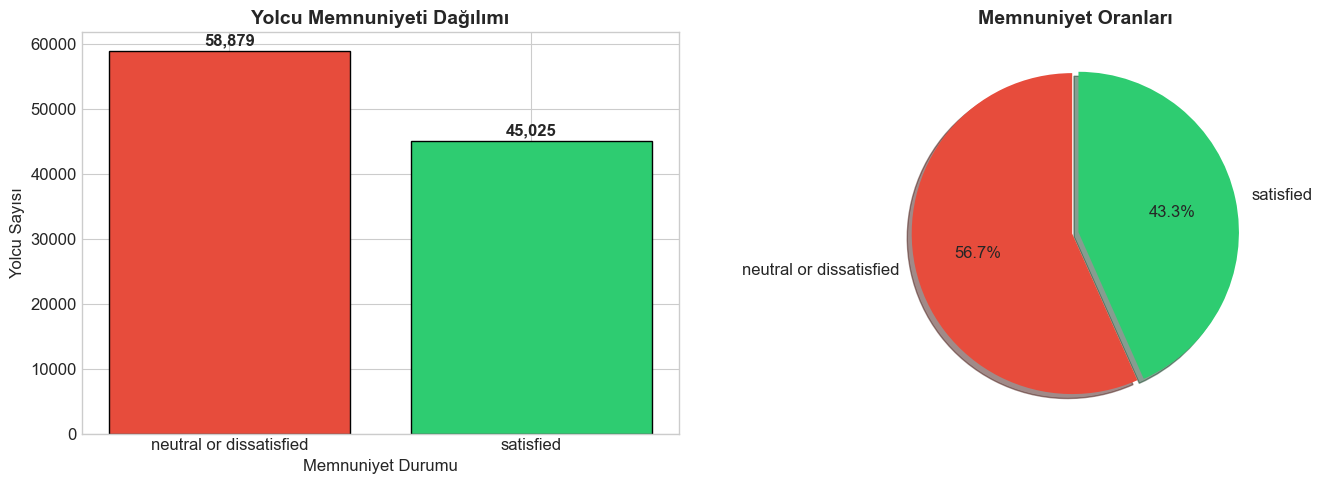

In [9]:
# Hedef değişken görselleştirmesi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar grafiği
colors = ['#e74c3c', '#2ecc71']
ax1 = axes[0]
bars = ax1.bar(target_counts.index, target_counts.values, color=colors, edgecolor='black')
ax1.set_title('Yolcu Memnuniyeti Dağılımı', fontsize=14, fontweight='bold')
ax1.set_xlabel('Memnuniyet Durumu')
ax1.set_ylabel('Yolcu Sayısı')

# Bar değerlerini yazıyoruz
for bar, count in zip(bars, target_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500, 
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

# Pasta grafiği
ax2 = axes[1]
wedges, texts, autotexts = ax2.pie(
    target_counts.values, 
    labels=target_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    explode=(0.02, 0.02),
    shadow=True,
    startangle=90
)
ax2.set_title('Memnuniyet Oranları', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 4️⃣ Sayısal Değişken Analizi

Sayısal değişkenlerin dağılımını ve hedef değişkenle ilişkisini inceliyoruz.

In [10]:
# Sayısal sütunları belirliyoruz
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Gereksiz sütunları çıkarıyoruz
cols_to_exclude = ['Unnamed: 0', 'id']
numeric_cols = [col for col in numeric_cols if col not in cols_to_exclude]

print(f"📊 Sayısal Değişkenler ({len(numeric_cols)} adet):")
for i, col in enumerate(numeric_cols, 1):
    print(f"   {i}. {col}")

📊 Sayısal Değişkenler (18 adet):
   1. Age
   2. Flight Distance
   3. Inflight wifi service
   4. Departure/Arrival time convenient
   5. Ease of Online booking
   6. Gate location
   7. Food and drink
   8. Online boarding
   9. Seat comfort
   10. Inflight entertainment
   11. On-board service
   12. Leg room service
   13. Baggage handling
   14. Checkin service
   15. Inflight service
   16. Cleanliness
   17. Departure Delay in Minutes
   18. Arrival Delay in Minutes


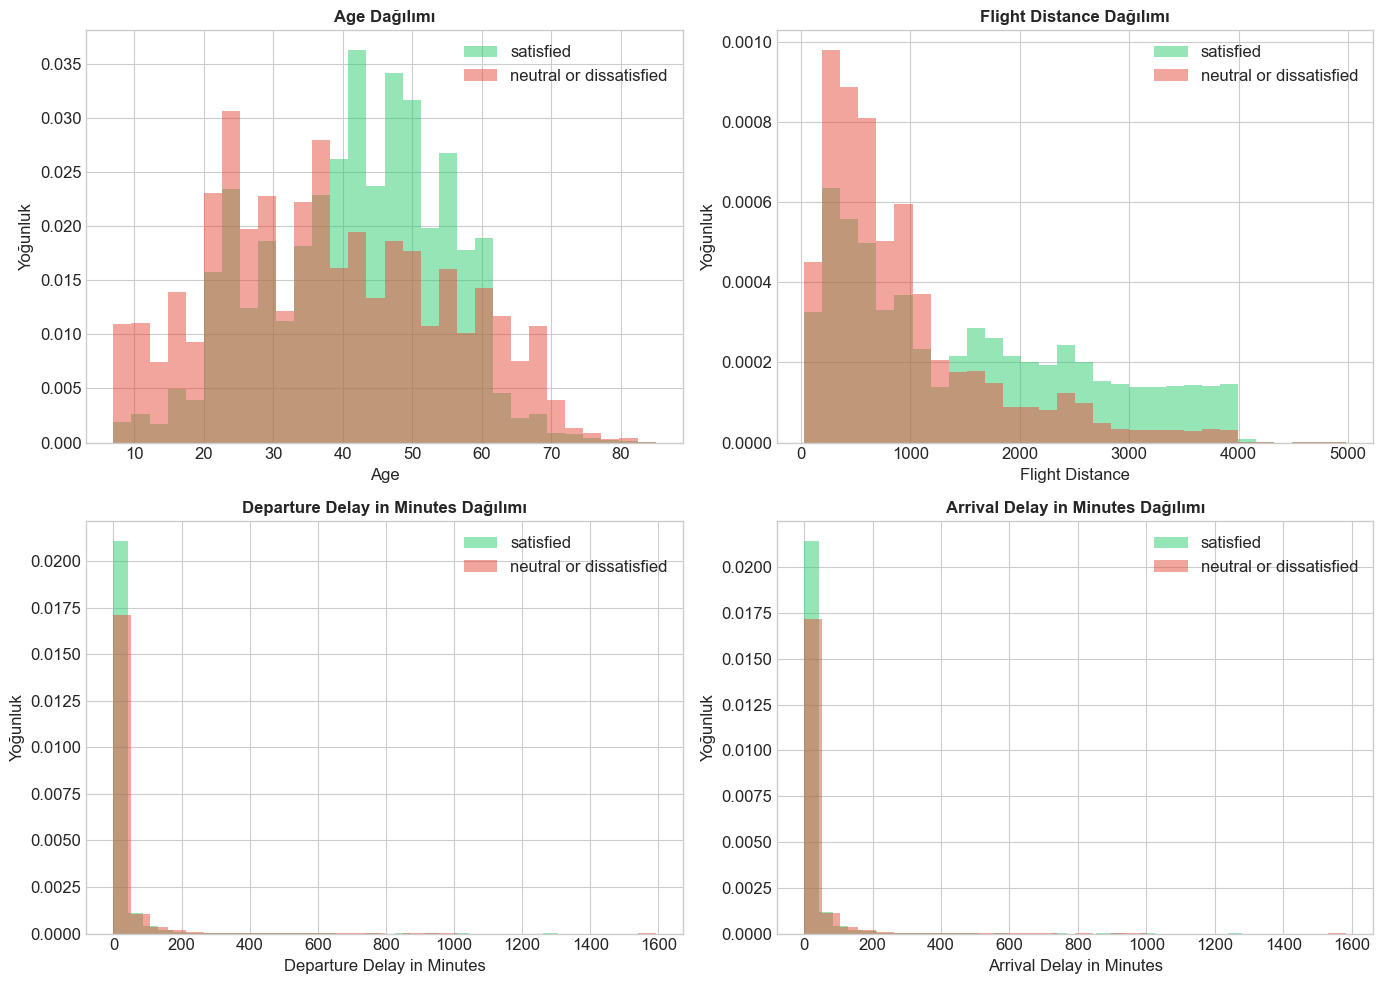

In [11]:
# Önemli sayısal değişkenlerin dağılımı
important_numeric = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
available_cols = [col for col in important_numeric if col in df.columns]

if len(available_cols) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    for i, col in enumerate(available_cols[:4]):
        ax = axes[i]
        
        # Histogram ve KDE
        for label, color in zip(['satisfied', 'neutral or dissatisfied'], ['#2ecc71', '#e74c3c']):
            data = df[df['satisfaction'] == label][col].dropna()
            ax.hist(data, bins=30, alpha=0.5, label=label, color=color, density=True)
        
        ax.set_title(f'{col} Dağılımı', fontsize=12, fontweight='bold')
        ax.set_xlabel(col)
        ax.set_ylabel('Yoğunluk')
        ax.legend()
    
    plt.tight_layout()
    plt.show()
else:
    print("Görselleştirilecek sütun bulunamadı.")

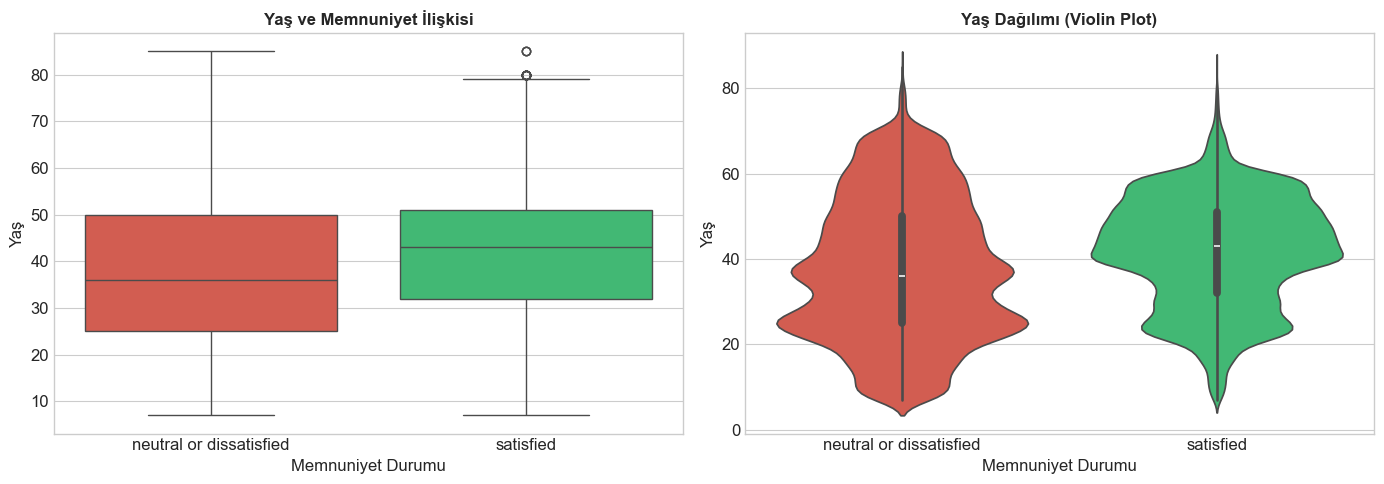

In [12]:
# Yaş ve memnuniyet ilişkisi (detaylı)
if 'Age' in df.columns:
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x='satisfaction', y='Age', palette=['#e74c3c', '#2ecc71'])
    plt.title('Yaş ve Memnuniyet İlişkisi', fontsize=12, fontweight='bold')
    plt.xlabel('Memnuniyet Durumu')
    plt.ylabel('Yaş')
    
    plt.subplot(1, 2, 2)
    sns.violinplot(data=df, x='satisfaction', y='Age', palette=['#e74c3c', '#2ecc71'])
    plt.title('Yaş Dağılımı (Violin Plot)', fontsize=12, fontweight='bold')
    plt.xlabel('Memnuniyet Durumu')
    plt.ylabel('Yaş')
    
    plt.tight_layout()
    plt.show()

## 5️⃣ Kategorik Değişken Analizi

Kategorik değişkenlerin dağılımını ve memnuniyetle ilişkisini inceliyoruz.

In [13]:
# Kategorik sütunları belirliyoruz
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'satisfaction']

print(f"📋 Kategorik Değişkenler ({len(categorical_cols)} adet):")
for i, col in enumerate(categorical_cols, 1):
    unique_vals = df[col].nunique()
    print(f"   {i}. {col} ({unique_vals} benzersiz değer)")

📋 Kategorik Değişkenler (4 adet):
   1. Gender (2 benzersiz değer)
   2. Customer Type (2 benzersiz değer)
   3. Type of Travel (2 benzersiz değer)
   4. Class (3 benzersiz değer)


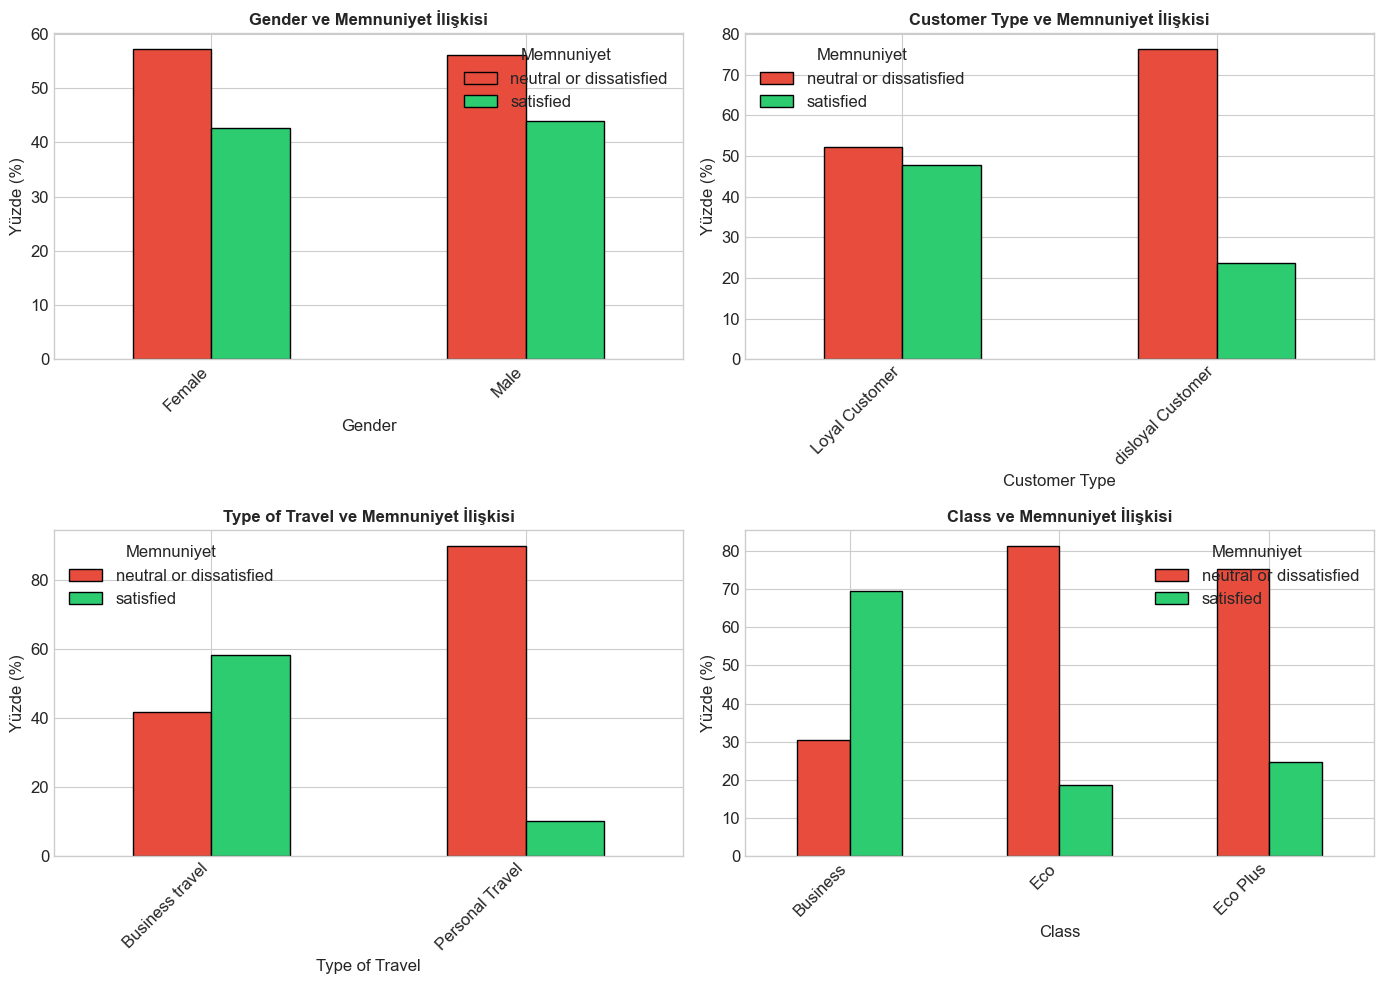

In [14]:
# Kategorik değişkenler ve memnuniyet ilişkisi
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols[:4]):
    ax = axes[i]
    
    # Çapraz tablo oluşturuyoruz
    cross_tab = pd.crosstab(df[col], df['satisfaction'], normalize='index') * 100
    
    cross_tab.plot(kind='bar', ax=ax, color=['#e74c3c', '#2ecc71'], edgecolor='black')
    ax.set_title(f'{col} ve Memnuniyet İlişkisi', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Yüzde (%)')
    ax.legend(title='Memnuniyet')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

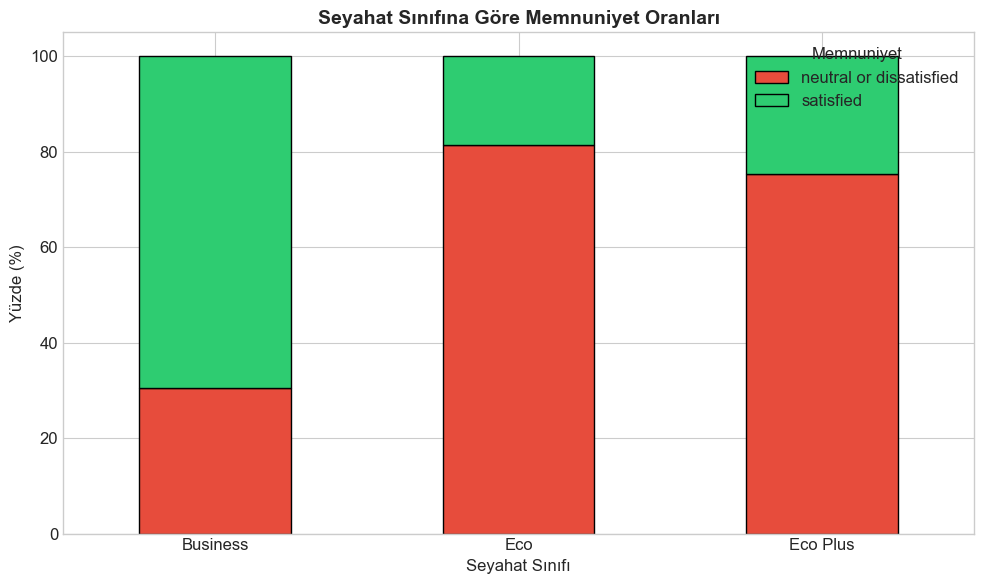


📊 Seyahat Sınıfı - Memnuniyet Oranları:
satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                         30.6       69.4
Eco                              81.4       18.6
Eco Plus                         75.4       24.6


In [15]:
# Seyahat sınıfı ve memnuniyet detaylı analizi
if 'Class' in df.columns:
    plt.figure(figsize=(10, 6))
    
    # Yüzdelik dağılım
    class_satisfaction = df.groupby(['Class', 'satisfaction']).size().unstack(fill_value=0)
    class_satisfaction_pct = class_satisfaction.div(class_satisfaction.sum(axis=1), axis=0) * 100
    
    class_satisfaction_pct.plot(kind='bar', stacked=True, color=['#e74c3c', '#2ecc71'], 
                                 edgecolor='black', figsize=(10, 6))
    
    plt.title('Seyahat Sınıfına Göre Memnuniyet Oranları', fontsize=14, fontweight='bold')
    plt.xlabel('Seyahat Sınıfı')
    plt.ylabel('Yüzde (%)')
    plt.legend(title='Memnuniyet', loc='upper right')
    plt.xticks(rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Seyahat Sınıfı - Memnuniyet Oranları:")
    print(class_satisfaction_pct.round(1))

## 6️⃣ Korelasyon Analizi

Sayısal değişkenler arasındaki korelasyonu inceliyoruz. Yüksek korelasyona sahip değişkenler multicollinearity sorununa yol açabilir.

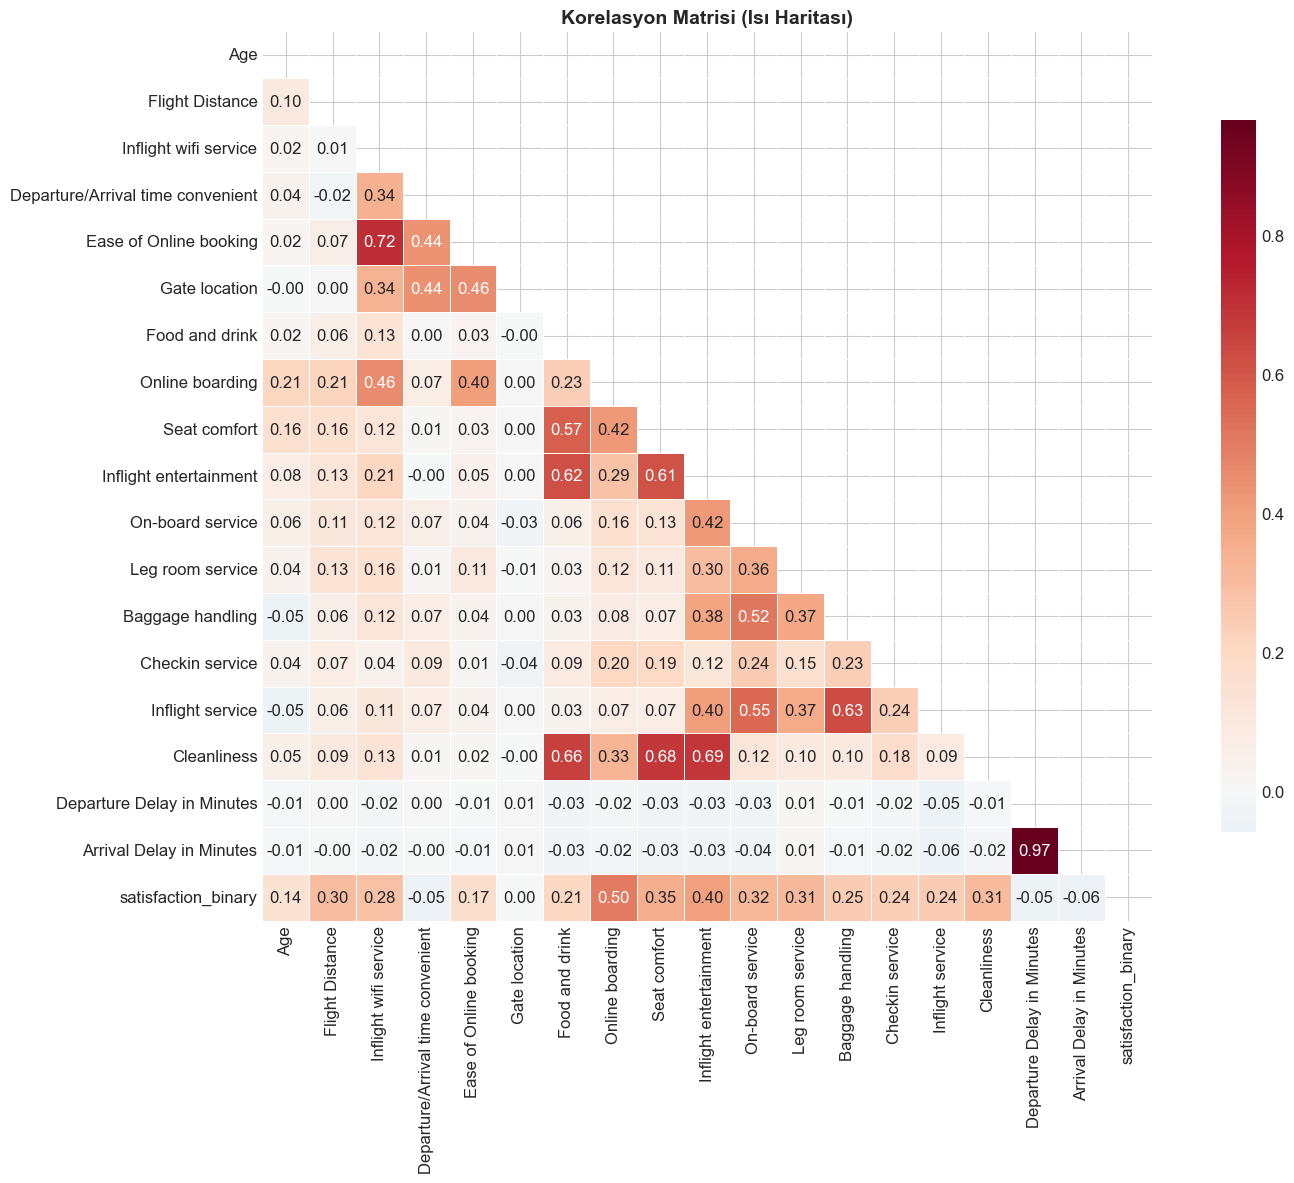

In [16]:
# Hedef değişkeni binary'e çeviriyoruz (korelasyon için)
df_corr = df.copy()
df_corr['satisfaction_binary'] = (df_corr['satisfaction'] == 'satisfied').astype(int)

# Sadece sayısal sütunları alıyoruz
numeric_for_corr = df_corr.select_dtypes(include=[np.number]).columns.tolist()
numeric_for_corr = [col for col in numeric_for_corr if col not in ['Unnamed: 0', 'id']]

# Korelasyon matrisi
corr_matrix = df_corr[numeric_for_corr].corr()

# Görselleştirme
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Korelasyon Matrisi (Isı Haritası)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
# Hedef değişkenle en yüksek korelasyona sahip özellikler
target_corr = corr_matrix['satisfaction_binary'].drop('satisfaction_binary').sort_values(key=abs, ascending=False)

print("🎯 HEDEF DEĞİŞKENLE KORELASYON (Mutlak Değere Göre Sıralı):")
print("="*60)

# Pozitif ve negatif korelasyonları ayırıyoruz
for feature, corr in target_corr.head(10).items():
    bar = '█' * int(abs(corr) * 20)
    sign = '+' if corr > 0 else '-'
    color_indicator = '🟢' if corr > 0 else '🔴'
    print(f"{color_indicator} {feature:<35} {sign}{abs(corr):.3f} {bar}")

print("\n📝 Yorum:")
print("   - Pozitif korelasyon (🟢): Değer arttıkça memnuniyet artıyor")
print("   - Negatif korelasyon (🔴): Değer arttıkça memnuniyet azalıyor")

🎯 HEDEF DEĞİŞKENLE KORELASYON (Mutlak Değere Göre Sıralı):
🟢 Online boarding                     +0.504 ██████████
🟢 Inflight entertainment              +0.398 ███████
🟢 Seat comfort                        +0.349 ██████
🟢 On-board service                    +0.322 ██████
🟢 Leg room service                    +0.313 ██████
🟢 Cleanliness                         +0.305 ██████
🟢 Flight Distance                     +0.299 █████
🟢 Inflight wifi service               +0.284 █████
🟢 Baggage handling                    +0.248 ████
🟢 Inflight service                    +0.245 ████

📝 Yorum:
   - Pozitif korelasyon (🟢): Değer arttıkça memnuniyet artıyor
   - Negatif korelasyon (🔴): Değer arttıkça memnuniyet azalıyor


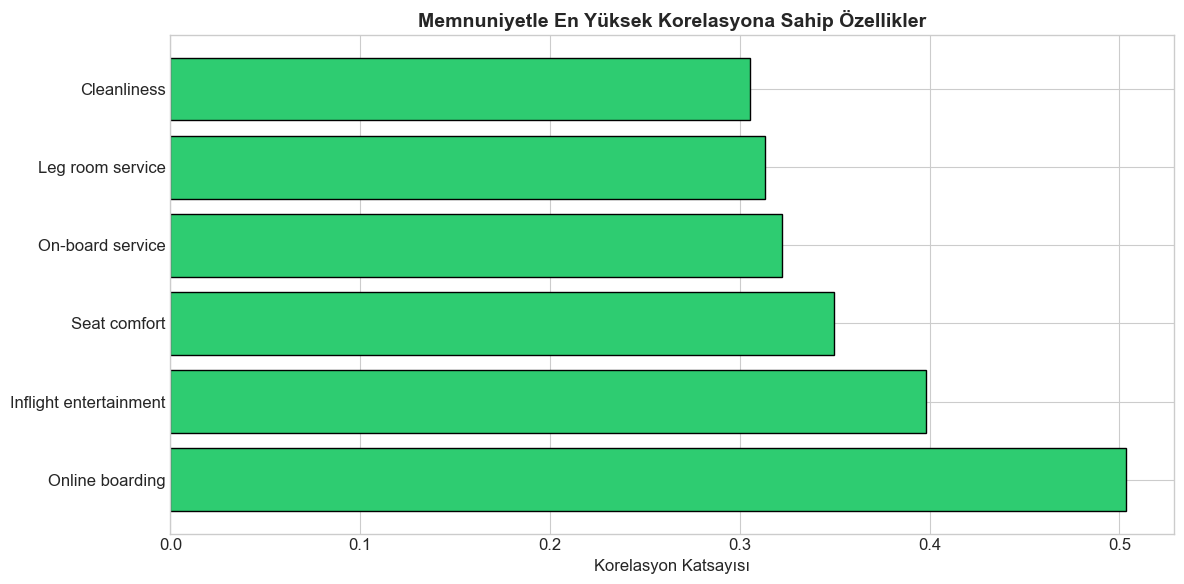

In [18]:
# En yüksek korelasyona sahip özelliklerin görselleştirilmesi
top_features = target_corr.head(6).index.tolist()

plt.figure(figsize=(12, 6))
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in target_corr.head(6).values]
bars = plt.barh(top_features, target_corr.head(6).values, color=colors, edgecolor='black')
plt.xlabel('Korelasyon Katsayısı')
plt.title('Memnuniyetle En Yüksek Korelasyona Sahip Özellikler', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

## 7️⃣ Hizmet Değerlendirmeleri ve Memnuniyet İlişkisi

Yolcuların verdiği hizmet puanlarının memnuniyetle ilişkisini detaylı inceliyoruz.

✓ 14 hizmet değerlendirmesi bulundu


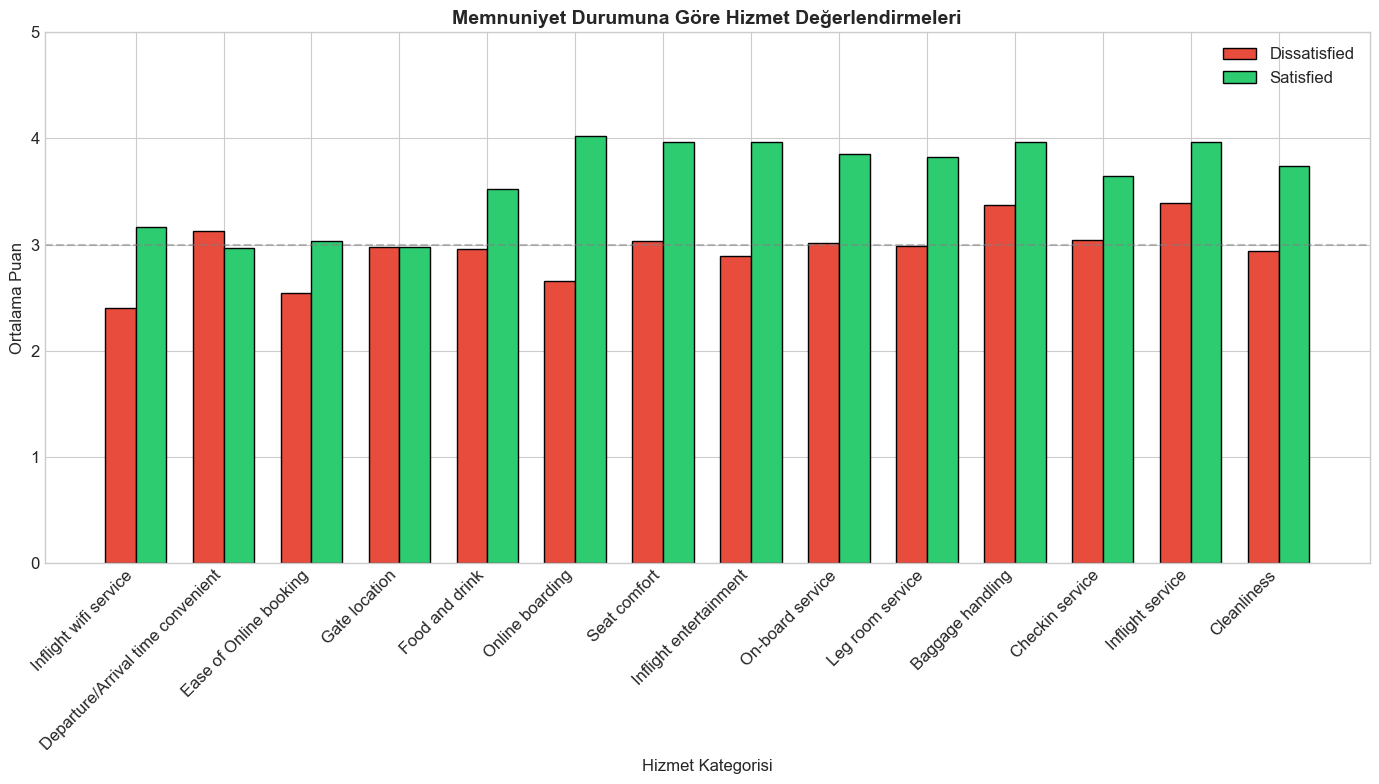

In [19]:
# Hizmet değerlendirme sütunlarını belirliyoruz
service_cols = [
    'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]

# Veri setinde mevcut olanları alıyoruz
available_services = [col for col in service_cols if col in df.columns]

if len(available_services) > 0:
    print(f"✓ {len(available_services)} hizmet değerlendirmesi bulundu")
    
    # Memnuniyet durumuna göre ortalama puanlar
    service_means = df.groupby('satisfaction')[available_services].mean()
    
    # Görselleştirme
    fig, ax = plt.subplots(figsize=(14, 8))
    
    x = np.arange(len(available_services))
    width = 0.35
    
    bars1 = ax.bar(x - width/2, service_means.loc['neutral or dissatisfied'], 
                   width, label='Dissatisfied', color='#e74c3c', edgecolor='black')
    bars2 = ax.bar(x + width/2, service_means.loc['satisfied'], 
                   width, label='Satisfied', color='#2ecc71', edgecolor='black')
    
    ax.set_xlabel('Hizmet Kategorisi', fontsize=12)
    ax.set_ylabel('Ortalama Puan', fontsize=12)
    ax.set_title('Memnuniyet Durumuna Göre Hizmet Değerlendirmeleri', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(available_services, rotation=45, ha='right')
    ax.legend()
    ax.set_ylim(0, 5)
    ax.axhline(y=3, color='gray', linestyle='--', alpha=0.5, label='Orta Puan')
    
    plt.tight_layout()
    plt.show()
else:
    print("Hizmet değerlendirme sütunları bulunamadı.")

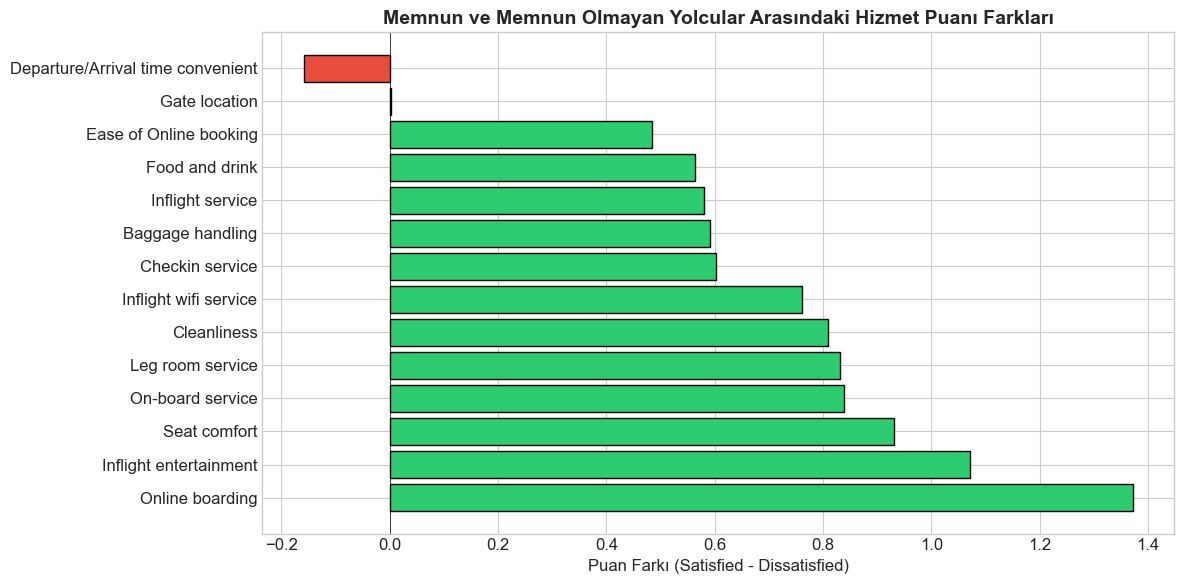


📊 EN BÜYÜK FARK GÖSTEREN HİZMETLER:
--------------------------------------------------
   Online boarding: +1.37 puan
   Inflight entertainment: +1.07 puan
   Seat comfort: +0.93 puan
   On-board service: +0.84 puan
   Leg room service: +0.83 puan


In [20]:
# Hizmet puanları arasındaki fark analizi
if len(available_services) > 0:
    # Memnun ve memnun olmayan gruplar arasındaki fark
    diff = service_means.loc['satisfied'] - service_means.loc['neutral or dissatisfied']
    diff_sorted = diff.sort_values(ascending=False)
    
    plt.figure(figsize=(12, 6))
    colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in diff_sorted.values]
    plt.barh(diff_sorted.index, diff_sorted.values, color=colors, edgecolor='black')
    plt.xlabel('Puan Farkı (Satisfied - Dissatisfied)', fontsize=12)
    plt.title('Memnun ve Memnun Olmayan Yolcular Arasındaki Hizmet Puanı Farkları', 
              fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
    print("\n📊 EN BÜYÜK FARK GÖSTEREN HİZMETLER:")
    print("-"*50)
    for service, difference in diff_sorted.head(5).items():
        print(f"   {service}: +{difference:.2f} puan")

## 8️⃣ Sonuç ve Öneriler

### Ana Bulgular

Bu keşifsel veri analizi sonucunda aşağıdaki önemli bulgulara ulaştık:

1. **Sınıf Dengesi**: Hedef değişken nispeten dengeli dağılım göstermektedir.

2. **Eksik Değerler**: [Analiz sonuçlarına göre güncellenecek]

3. **Önemli Özellikler**: Hizmet değerlendirmeleri memnuniyeti doğrudan etkileyen en önemli faktörlerdir.

4. **Seyahat Sınıfı**: Business sınıfı yolcuları genellikle daha yüksek memnuniyet göstermektedir.

### Model Geliştirme Önerileri

- Sayısal değişkenler için StandardScaler kullanılmalı
- Kategorik değişkenler için Label Encoding uygulanmalı
- En yüksek korelasyona sahip özellikler önceliklendirilmeli
- Random Forest ve Logistic Regression modelleri karşılaştırılmalı

In [21]:
print("="*60)
print("✅ KEŞİFSEL VERİ ANALİZİ TAMAMLANDI!")
print("="*60)
print("\nSonraki adım: main.py dosyasını çalıştırarak model eğitimi yapın.")
print("Komut: python main.py")

✅ KEŞİFSEL VERİ ANALİZİ TAMAMLANDI!

Sonraki adım: main.py dosyasını çalıştırarak model eğitimi yapın.
Komut: python main.py
